# Code demo for resampling
## Self made Cross Validation
We want to assess the performance of our model, i.e., try to estimate its generalization error. Why is it a good idea to use cross-validation (CV)?
Let’s write our very own CV function for a k-NN learner to experiment with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('spirals.csv',usecols=['x.1','x.2','classes'])
df.classes.replace({1:0,2:1},inplace=True)

In [3]:
df.head()

,x.1,x.2,classes
0,-0.096836,-0.429970,1
1,0.689233,-0.003592,1
2,0.214289,0.037893,0
3,0.243255,0.801758,1
4,-0.046206,-0.604098,1


In [4]:
def knn_cv(df,target,folds,k):
    
    all_indices = np.arange(len(df))
    np.random.shuffle(all_indices)
    data_len = len(df)//folds
    index_matrix = all_indices[:data_len*folds].reshape(folds,data_len)
    cv_results=[]

    for i in range(folds):
        test_data = df.iloc[index_matrix[i]]
        train_data = df.drop(index_matrix[i])

        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X=train_data.drop(target,axis=1).values,y=train_data[target])
        pred = clf.predict(test_data.drop(target,axis=1).values)
        cv_results.append(np.mean(pred!=test_data[target]))
        
    return cv_results

In [5]:
cv_results = knn_cv(df = df, target = "classes", folds = 11, k = 4)

In [6]:
cv_results

[0.06666666666666667,
 0.044444444444444446,
 0.06666666666666667,
 0.08888888888888889,
 0.044444444444444446,
 0.08888888888888889,
 0.022222222222222223,
 0.044444444444444446,
 0.044444444444444446,
 0.1111111111111111,
 0.1111111111111111]

In [7]:
avg = np.mean(cv_results)
std = np.std(cv_results)
avg,std

(0.06666666666666667, 0.028426762180748057)

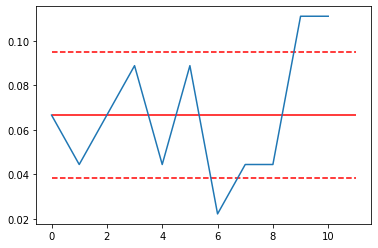

In [8]:
plt.plot(cv_results);
plt.hlines(avg,0,11,colors='r');
plt.hlines(avg+std,0,11,colors='r',linestyles='dashed');
plt.hlines(avg-std,0,11,colors='r',linestyles='dashed');

In [9]:
cv_folds = [2,3,4]+np.arange(5,65,5).tolist()
cv_folds

[2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

In [10]:
cv_results = [knn_cv(df = df, target = "classes", folds = num_fold, k = 4) for num_fold in cv_folds]

/raid/anaconda3/envs/datascience/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


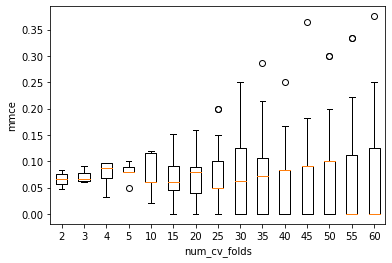

In [11]:
plt.boxplot(cv_results);
plt.xlabel('num_cv_folds')
plt.ylabel('mmce');
ymin,ymax=plt.gca().get_ylim()
plt.xticks(np.arange(1,len(cv_folds)+1),labels=cv_folds);

The more we increase the number of folds, the larger each training set becomes. Hence the pessimistic bias
for the estimated model performance becomes smaller.
But since the test sets also become smaller, the variance of the resulting performance estimate increases.
In addition, with a higher number of folds, the computation time increases. (Think about that: by how
much? is the increase linear in the number of folds? why or why not?)
Can we get better results with a smaller amount of computation? Let’s see what happens if we do repeated
CV and collect only their means:

In [12]:
cv_folds = np.arange(5,25,5).tolist()
cv_folds

[5, 10, 15, 20]

In [13]:
cv_results = [knn_cv(df = df, target = "classes", folds = num_fold, k = 4) for num_fold in cv_folds]

/raid/anaconda3/envs/datascience/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


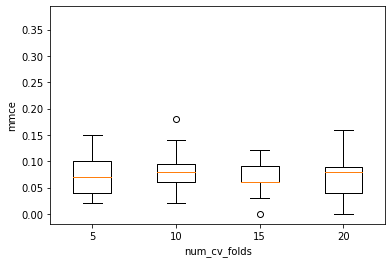

In [14]:
plt.boxplot(cv_results);
plt.xlabel('num_cv_folds')
plt.ylabel('mmce');
plt.gca().set_ylim(ymin,ymax);
plt.xticks(np.arange(1,5),labels=cv_folds);

# Scikit-Learn's CV Implementation

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
clf = KNeighborsClassifier(n_neighbors=4)

In [19]:
target = 'classes'
scores = cross_val_score(clf, X=df.drop(target,axis=1).values,y=df[target], cv=5)

In [20]:
scores

array([0.64, 0.79, 0.6 , 0.64, 0.53])